In [ ]:
# Upload the CSV from computer and load into a DataFrame
from google.colab import files
import io
import pandas as pd

print("Choose the CSV file you downloaded.")
uploaded = files.upload()              # click the file picker and select CSV
fname = next(iter(uploaded))
print("Uploaded file:", fname)

df = pd.read_csv(io.BytesIO(uploaded[fname]), encoding='ISO-8859-1')
print("Loaded shape:", df.shape)
df.head()


Choose the CSV file you downloaded.


Saving Online Retail.csv to Online Retail.csv
Uploaded file: Online Retail.csv
Loaded shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Check column names, missing counts and data types
df.columns = df.columns.str.strip()   # remove stray spaces in column names
print("Columns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isna().sum())
print("\nData types:")
print(df.dtypes)

# show first rows of the key columns we need
display(df[['InvoiceNo','InvoiceDate','Quantity','UnitPrice','CustomerID']].head(8))


Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


,InvoiceNo,InvoiceDate,Quantity,UnitPrice,CustomerID
0,536365,12/1/2010 8:26,6,2.55,17850.0
1,536365,12/1/2010 8:26,6,3.39,17850.0
2,536365,12/1/2010 8:26,8,2.75,17850.0
3,536365,12/1/2010 8:26,6,3.39,17850.0
4,536365,12/1/2010 8:26,6,3.39,17850.0
5,536365,12/1/2010 8:26,2,7.65,17850.0
6,536365,12/1/2010 8:26,6,4.25,17850.0
7,536366,12/1/2010 8:28,6,1.85,17850.0


In [ ]:
# Convert InvoiceDate to datetime and check the result
df['InvoiceDate_parsed'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', infer_datetime_format=True)
print("Parsed dates non-null:", df['InvoiceDate_parsed'].notna().sum(), "of", len(df))
display(df[['InvoiceDate','InvoiceDate_parsed']].head(8))
print("Date range:", df['InvoiceDate_parsed'].min(), "to", df['InvoiceDate_parsed'].max())


# df['InvoiceDate_parsed'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

# Replace original column with parsed datetimes
df['InvoiceDate'] = df['InvoiceDate_parsed']
df.drop(columns=['InvoiceDate_parsed'], inplace=True)


Parsed dates non-null: 541909 of 541909


/tmp/ipython-input-2766559044.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['InvoiceDate_parsed'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', infer_datetime_format=True)


,InvoiceDate,InvoiceDate_parsed
0,12/1/2010 8:26,2010-12-01 08:26:00
1,12/1/2010 8:26,2010-12-01 08:26:00
2,12/1/2010 8:26,2010-12-01 08:26:00
3,12/1/2010 8:26,2010-12-01 08:26:00
4,12/1/2010 8:26,2010-12-01 08:26:00
5,12/1/2010 8:26,2010-12-01 08:26:00
6,12/1/2010 8:26,2010-12-01 08:26:00
7,12/1/2010 8:28,2010-12-01 08:28:00


Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [ ]:
# Remove cancellations, bad rows, set types, and add TotalPrice
print("Shape before cleaning:", df.shape)

# 1) remove cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 2) remove zero or negative quantity and unit price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 3) drop rows without CustomerID (we need CustomerID for RFM)
df = df.dropna(subset=['CustomerID'])

# 4) ensure CustomerID is integer
df['CustomerID'] = df['CustomerID'].astype(int)

# 5) compute line total
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print("Shape after cleaning:", df.shape)
print("Unique customers:", df['CustomerID'].nunique())
print("Total revenue (sum of TotalPrice):", df['TotalPrice'].sum())
df.head()


Shape before cleaning: (541909, 8)
Shape after cleaning: (397884, 9)
Unique customers: 4338
Total revenue (sum of TotalPrice): 8911407.904


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Remove cancellations, bad rows, set types, and add TotalPrice
print("Shape before cleaning:", df.shape)

# 1) remove cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 2) remove zero or negative quantity and unit price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 3) drop rows without CustomerID (we need CustomerID for RFM)
df = df.dropna(subset=['CustomerID'])

# 4) ensure CustomerID is integer
df['CustomerID'] = df['CustomerID'].astype(int)

# 5) compute line total
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print("Shape after cleaning:", df.shape)
print("Unique customers:", df['CustomerID'].nunique())
print("Total revenue (sum of TotalPrice):", df['TotalPrice'].sum())
df.head()


Shape before cleaning: (397884, 9)
Shape after cleaning: (397884, 9)
Unique customers: 4338
Total revenue (sum of TotalPrice): 8911407.904


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
import pandas as pd
import numpy as np

# snapshot = one day after the last invoice in your cleaned df
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Snapshot date:", snapshot_date.date())

# aggregate into RFM
rfm = df.groupby('CustomerID').agg(
    Recency = ('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency = ('InvoiceNo', 'nunique'),
    Monetary = ('TotalPrice', 'sum')
).reset_index()

print("RFM table shape:", rfm.shape)
rfm.head()


Snapshot date: 2011-12-10
RFM table shape: (4338, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [ ]:
# helper that falls back to rank if qcut fails because of duplicates
def safe_qcut(series, q=5, labels=None):
    try:
        return pd.qcut(series, q, labels=labels)
    except ValueError:
        # fall back: rank then qcut
        ranked = series.rank(method='first')
        return pd.qcut(ranked, q, labels=labels)

# labels: for Recency higher is better so we give highest label to smallest days
r_labels = [5,4,3,2,1]     # 5 = most recent
f_labels = [1,2,3,4,5]     # 5 = most frequent
m_labels = [1,2,3,4,5]     # 5 = highest spenders

# apply safe qcut
rfm['R_Score'] = safe_qcut(rfm['Recency'], 5, labels=r_labels).astype(int)
rfm['F_Score'] = safe_qcut(rfm['Frequency'].rank(method='first'), 5, labels=f_labels).astype(int)
rfm['M_Score'] = safe_qcut(rfm['Monetary'].rank(method='first'), 5, labels=m_labels).astype(int)

# combined fields
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Sum'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Sum
0,12346,326,1,77183.60,1,1,5,115,7
1,12347,2,7,4310.00,5,5,5,555,15
2,12348,75,4,1797.24,2,4,4,244,10
3,12349,19,1,1757.55,4,1,4,414,9
4,12350,310,1,334.40,1,1,2,112,4


In [ ]:
def assign_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r == 5 and f >= 4 and m >= 4:
        return 'Champions'
    if r >= 4 and f >= 3:
        return 'Loyal'
    if r >= 3 and f >= 3:
        return 'Potential Loyalist'
    if r >= 3 and f >= 2:
        return 'New / Promising'
    if r <= 2 and f >= 3:
        return 'At Risk'
    if r <= 2 and f <= 2:
        return 'Lost'
    return 'Others'

rfm['Segment'] = rfm.apply(assign_segment, axis=1)

# quick check: counts and revenue by segment
seg_counts = rfm['Segment'].value_counts()
seg_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

print("Customer counts by segment:\n", seg_counts)
print("\nRevenue by segment:\n", seg_revenue)
rfm.head()


Customer counts by segment:
 Segment
Lost                  1065
Loyal                  896
At Risk                643
Champions              557
Potential Loyalist     507
New / Promising        365
Others                 305
Name: count, dtype: int64

Revenue by segment:
 Segment
Champions             4290990.170
Loyal                 2051225.381
Potential Loyalist     941253.070
At Risk                800531.551
Lost                   519408.572
New / Promising        187587.780
Others                 120411.380
Name: Monetary, dtype: float64


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Sum,Segment
0,12346,326,1,77183.60,1,1,5,115,7,Lost
1,12347,2,7,4310.00,5,5,5,555,15,Champions
2,12348,75,4,1797.24,2,4,4,244,10,At Risk
3,12349,19,1,1757.55,4,1,4,414,9,Others
4,12350,310,1,334.40,1,1,2,112,4,Lost


In [ ]:
# top 10 customers by monetary value
top10 = rfm.sort_values('Monetary', ascending=False).head(10)
print("Top 10 customers by total spend:")
display(top10[['CustomerID','Recency','Frequency','Monetary','RFM_Score','Segment']])

# summary stats
display(rfm[['Recency','Frequency','Monetary','R_Score','F_Score','M_Score','RFM_Sum']].describe().round(1))


Top 10 customers by total spend:


,CustomerID,Recency,Frequency,Monetary,RFM_Score,Segment
1689,14646,2,73,280206.02,555,Champions
4201,18102,1,60,259657.30,555,Champions
3728,17450,8,46,194550.79,555,Champions
3008,16446,1,2,168472.50,535,Loyal
1879,14911,1,201,143825.06,555,Champions
55,12415,24,21,124914.53,455,Loyal
1333,14156,10,55,117379.63,555,Champions
3771,17511,3,31,91062.38,555,Champions
2702,16029,39,63,81024.84,355,Potential Loyalist
0,12346,326,1,77183.60,115,Lost


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Sum
count,4338.0,4338.0,4338.0,4338.0,4338.0,4338.0,4338.0
mean,92.5,4.3,2054.3,3.0,3.0,3.0,9.0
std,100.0,7.7,8989.2,1.4,1.4,1.4,3.6
min,1.0,1.0,3.8,1.0,1.0,1.0,3.0
25%,18.0,1.0,307.4,2.0,2.0,2.0,6.0
50%,51.0,2.0,674.5,3.0,3.0,3.0,9.0
75%,142.0,5.0,1661.7,4.0,4.0,4.0,12.0
max,374.0,209.0,280206.0,5.0,5.0,5.0,15.0


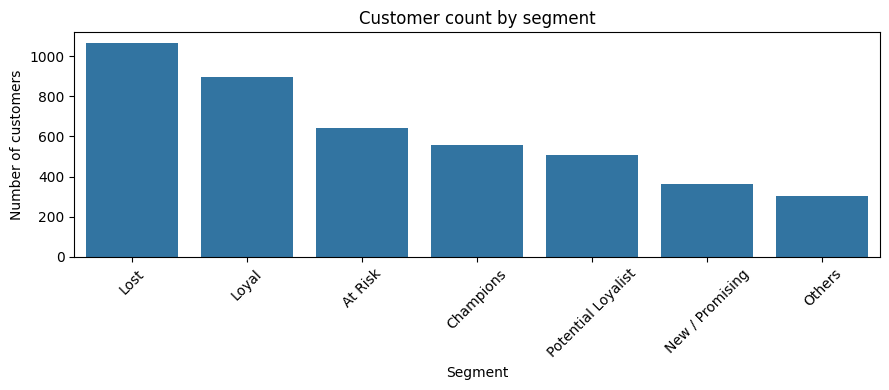

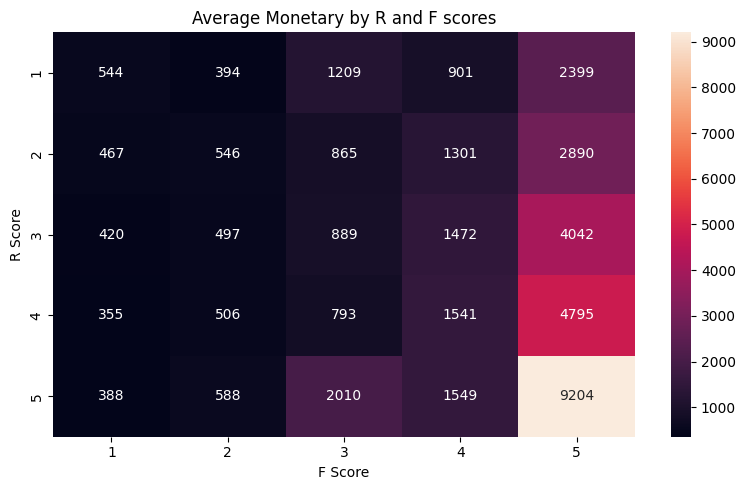

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) customers per segment
plt.figure(figsize=(9,4))
order = rfm['Segment'].value_counts().index
sns.countplot(data=rfm, x='Segment', order=order)
plt.xticks(rotation=45)
plt.title('Customer count by segment')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

# 2) heatmap: average Monetary per R vs F
pivot = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt='.0f')
plt.title('Average Monetary by R and F scores')
plt.xlabel('F Score')
plt.ylabel('R Score')
plt.tight_layout()
plt.show()


In [ ]:
rfm_out_name = 'rfm_table.csv'
rfm.to_csv(rfm_out_name, index=False)
from google.colab import files as colab_files
colab_files.download(rfm_out_name)
print("Saved and starting download:", rfm_out_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved and starting download: rfm_table.csv
